# General Regression Neural Network (GRNN)
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

In [3]:
df = pd.read_csv('../../dataset/DENSITY-BASED LEARNING/city_lifestyle_dataset.csv')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

X = df[numeric_cols[:-1]].fillna(df[numeric_cols[:-1]].mean()).values
y = df[numeric_cols[-1]].fillna(df[numeric_cols[-1]].mean()).values

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

print(f'Training shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Training shape: (240, 7)
Test shape: (60, 7)


In [4]:
class GRNN:
    def __init__(self, sigma=0.1):
        self.sigma = sigma
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.sum((self.X_train - x) ** 2, axis=1)
            kernels = np.exp(-distances / (2 * self.sigma ** 2))
            num = np.sum(kernels * self.y_train)
            denom = np.sum(kernels)
            if denom == 0:
                predictions.append(np.mean(self.y_train))
            else:
                predictions.append(num / denom)
        return np.array(predictions)

sigmas = np.linspace(0.01, 1.0, 30)
best_score = float('-inf')
best_sigma = 0.1

for sigma in sigmas:
    model = GRNN(sigma=sigma)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if r2 > best_score:
        best_score = r2
        best_sigma = sigma

print(f'Best sigma: {best_sigma:.4f}')

Best sigma: 0.6245


In [5]:
grnn = GRNN(sigma=best_sigma)
grnn.fit(X_train, y_train)
y_pred = grnn.predict(X_test)

y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 0.5258
RMSE: 0.7251
R² Score: 0.3714


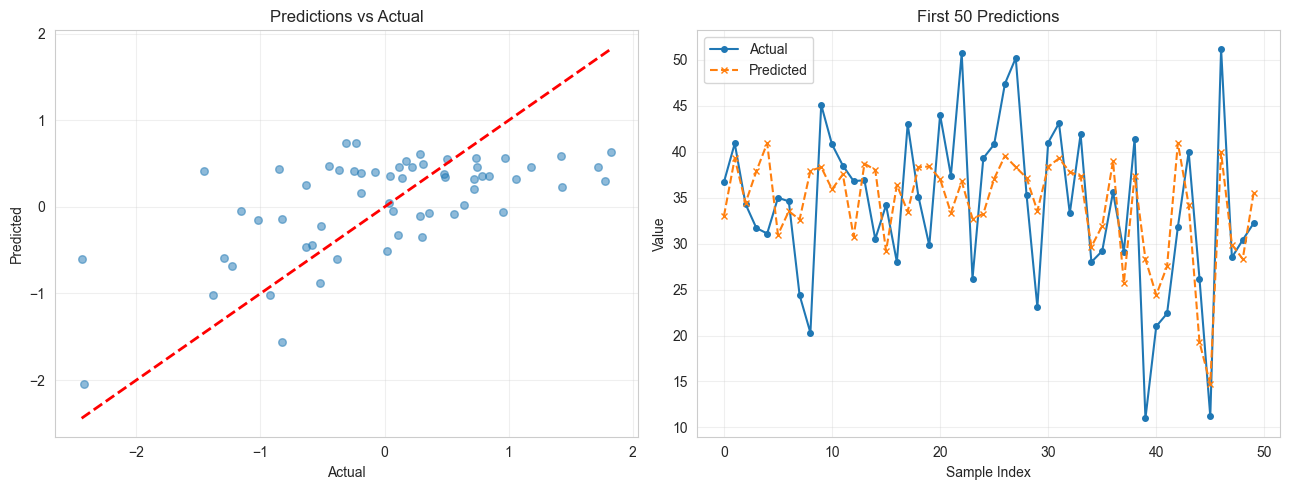

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.scatter(y_test, y_pred, alpha=0.5, s=30)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('Predictions vs Actual')
ax1.grid(alpha=0.3)

ax2.plot(y_test_original[:50], label='Actual', marker='o', markersize=4)
ax2.plot(y_pred_original[:50], label='Predicted', marker='x', markersize=4, linestyle='--')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Value')
ax2.set_title('First 50 Predictions')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

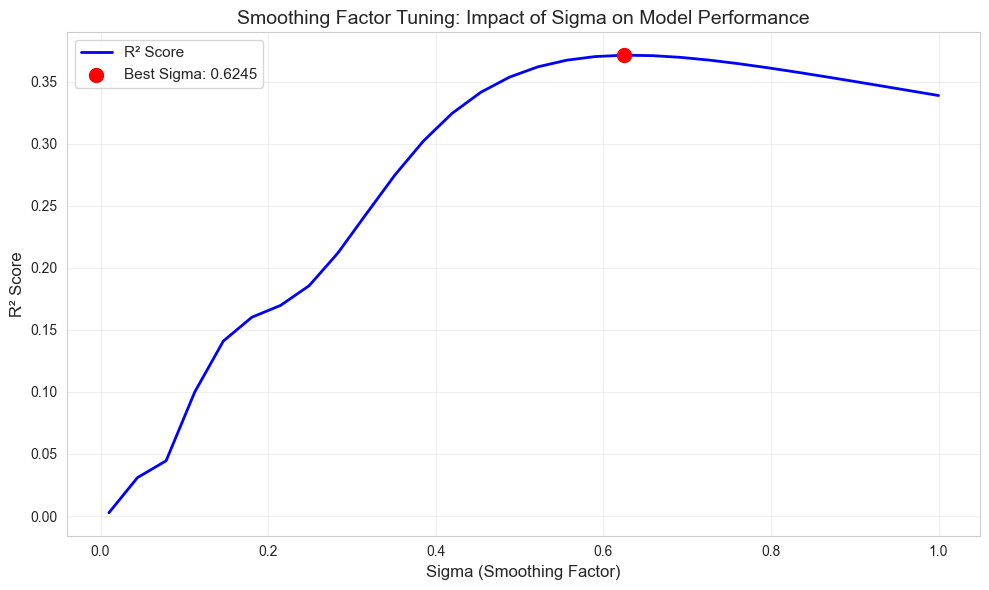

In [7]:
sigmas_tested = np.linspace(0.01, 1.0, 30)
r2_scores = []

for sigma in sigmas_tested:
    model = GRNN(sigma=sigma)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(sigmas_tested, r2_scores, 'b-', linewidth=2, label='R² Score')
plt.scatter([best_sigma], [max(r2_scores)], color='red', s=100, zorder=5, label=f'Best Sigma: {best_sigma:.4f}')
plt.xlabel('Sigma (Smoothing Factor)', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Smoothing Factor Tuning: Impact of Sigma on Model Performance', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()
